In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import json
from iexfinance.stocks import get_historical_data
import iexfinance as iex

%matplotlib inline

In [2]:
API_Tokens = os.getenv("IEX_TOKEN")
API_Tokens_Secret = os.getenv("IEX_TOKEN_SECRET")
print(len(API_Tokens))
print(len(API_Tokens_Secret))

35
35


In [3]:
#list_of_tickers = ["SPY","QQQ"]
# Set Dates
#end_date = datetime.now()
#start_date = end_date + timedelta(-1825)
#Pull Data From IEX Finance
#spy_df = get_historical_data(list_of_tickers, start_date, end_date, close_only=True, output_format='pandas')
#spy_df.drop(columns='volume', level=1,inplace=True)
#spy_df.head()

In [4]:
#spy_df.to_csv('spy&QQQ.csv')

NameError: name 'spy_df' is not defined

In [5]:
spy_org = pd.read_csv('spy&QQQ')
spy_org.drop([1259,1260],inplace= True)
spy_org.rename(columns = {"Unnamed: 0":"Date"},inplace = True)
spy_org.dropna(inplace=True)
spy_org.set_index("Date",inplace=True)

FileNotFoundError: [Errno 2] File b'spy&QQQ' does not exist: b'spy&QQQ'

In [107]:
spy_org['SPY']=spy_org['SPY'].astype('float')
spy_org['QQQ']=spy_org['QQQ'].astype('float')

In [35]:
#list_of_tickers = ["IWM","SMH","IBB","XLU","VOOG"]
#"VOOV","EZU","EWT","EEM","AIA"
# Set Dates
#end_date = datetime.now()
#start_date = end_date + timedelta(-1825)
#Pull Data From IEX Finance
#etf_df = get_historical_data(list_of_tickers, start_date, end_date, close_only=True, output_format='pandas')
#etf_df.drop(columns='volume', level=1,inplace=True)
#etf_df.head()

,IWM,SMH,IBB,XLU,VOOG
,close,close,close,close,close
date,,,,,
2015-02-11,119.45,55.28,105.75,46.08,101.52
2015-02-12,120.81,56.06,106.81,45.87,102.60
2015-02-13,121.53,56.39,107.82,45.17,103.12
2015-02-17,121.91,56.63,108.94,45.13,103.24
2015-02-18,122.04,56.44,109.81,46.20,103.44


In [108]:
etf_df.to_csv('IWM&SMH&IBB&XLU&VOOG.csv')

In [109]:
etf_1 = pd.read_csv('IWM&SMH&IBB&XLU&VOOG.csv')
etf_1.drop([1259,1260],inplace= True)
etf_1.rename(columns = {"Unnamed: 0":"Date"},inplace = True)
etf_1.dropna(inplace=True)
etf_1.set_index("Date",inplace=True)

In [110]:
etf_1['IWM']=etf_1['IWM'].astype('float')
etf_1['SMH']=etf_1['SMH'].astype('float')
etf_1['IBB']=etf_1['IBB'].astype('float')
etf_1['XLU']=etf_1['XLU'].astype('float')
etf_1['VOOG']=etf_1['VOOG'].astype('float')

In [43]:
#list_of_tickers = ["VOOV","EZU"]
#"EWT","EEM","AIA"
# Set Dates
#end_date = datetime.now()
#start_date = end_date + timedelta(-1825)
#Pull Data From IEX Finance
#etf_2_df = get_historical_data(list_of_tickers, start_date, end_date, close_only=True, output_format='pandas')
#etf_2_df.drop(columns='volume', level=1,inplace=True)
#etf_2_df.head()

,VOOV,EZU
,close,close
date,,
2015-02-11,89.86,37.22
2015-02-12,90.75,38.20
2015-02-13,91.08,38.29
2015-02-17,91.13,38.34
2015-02-18,91.01,38.44


In [ ]:
etf_2_df.to_csv('VOOV&EZU.csv')

In [85]:
etf_2 = pd.read_csv('VOOV&EZU.csv')
etf_2.drop([1259,1260],inplace= True)
etf_2.rename(columns = {"Unnamed: 0":"Date"},inplace = True)
etf_2.dropna(inplace=True)
etf_2.set_index("Date",inplace=True)
etf_2['VOOV']=etf_2['VOOV'].astype('float')
etf_2['EZU']=etf_2['EZU'].astype('float')

In [111]:
stock_etf_combined = pd.concat([etf_2,etf_1,spy_org], axis=1 , join = "inner")
stock_etf_combined.to_csv('Stock ETF data pull.csv')

In [112]:
# ETF daily return
etf_daily_return = etf_combined.pct_change()
etf_daily_return.dropna(inplace=True)
etf_daily_return

,VOOV,EZU,IWM,SMH,IBB,XLU,VOOG,SPY,QQQ
Date,,,,,,,,,
2015-02-12,0.009904,0.026330,0.011386,0.014110,0.010024,-0.004557,0.010638,0.009617,0.011643
2015-02-13,0.003636,0.002356,0.005960,0.005887,0.009456,-0.015261,0.005068,0.004116,0.008585
2015-02-17,0.000549,0.001306,0.003127,0.004256,0.010388,-0.000886,0.001164,0.001573,0.000935
2015-02-18,-0.001317,0.002608,0.001066,-0.003355,0.007986,0.023709,0.001937,0.000095,0.001402
2015-02-19,-0.002857,-0.001041,0.000082,0.000532,0.007741,-0.011255,0.001933,-0.000714,0.004946
...,...,...,...,...,...,...,...,...,...
2020-02-03,0.003189,0.003953,0.011151,0.013666,0.017661,0.003189,0.011048,0.007429,0.015109
2020-02-04,0.011657,0.016732,0.015094,0.032198,0.023571,-0.009971,0.018248,0.015241,0.022889
2020-02-05,0.018050,0.011133,0.015415,0.019869,0.025390,0.004087,0.005502,0.011548,0.003297


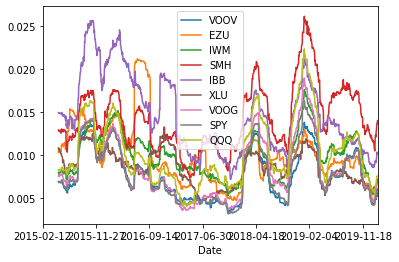

In [115]:
# ETF stdev
etf_stdev = etf_daily_return.rolling(window = 60).std()
etf_stdev.plot()

In [104]:
# ETF Sharpe Ratio
etf_sharpe_ratio = (etf_daily_return.mean()*252)/(etf_stdev*np.sqrt(252))

In [103]:
# Correlation between ETF
etf_corr = correlation = etf_daily_return.corr() 

In [ ]:


#get list of columns
#loop through list of columns
#on each loop, change data type